In [1]:
# Import Required Depencies:

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read csv file into a pandas dataframe:

df_clean = pd.read_csv('./Resources/cleaned_emissions_data.csv')
df_clean

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,AFG,1970,1.670397,0.436974,0.671986,0.216651,0.047350,0.297436,0.155343
1,Afghanistan,AFG,1971,1.893554,0.359072,0.747456,0.439680,0.043234,0.304112,0.171893
2,Afghanistan,AFG,1972,1.530347,0.190528,0.626544,0.300448,0.046427,0.366400,0.135588
3,Afghanistan,AFG,1973,1.635454,0.310745,0.701918,0.332680,0.067106,0.223005,0.141288
4,Afghanistan,AFG,1974,1.913152,0.304695,0.770914,0.400141,0.070301,0.367102,0.161177
...,...,...,...,...,...,...,...,...,...,...
3153,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
3154,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
3155,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
3156,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [3]:
# Remove columns "ISO 3166-1 alpha-3" and "Country" as they have string values and are not necessary for the models:

df_clean = df_clean.drop(['ISO 3166-1 alpha-3','Country'], axis=1)

In [4]:
# View Dataframe after dropping columns:

df_clean

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,1970,1.670397,0.436974,0.671986,0.216651,0.047350,0.297436,0.155343
1,1971,1.893554,0.359072,0.747456,0.439680,0.043234,0.304112,0.171893
2,1972,1.530347,0.190528,0.626544,0.300448,0.046427,0.366400,0.135588
3,1973,1.635454,0.310745,0.701918,0.332680,0.067106,0.223005,0.141288
4,1974,1.913152,0.304695,0.770914,0.400141,0.070301,0.367102,0.161177
...,...,...,...,...,...,...,...,...
3153,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,4.749682
3154,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,4.792753
3155,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,4.775633
3156,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,4.497423


In [5]:
df_train = df_clean.loc[0:2210]
df_test = df_clean.loc[2210:3158]

In [6]:
# Create X and y variables that hold training and testing data required for the regression models:

X_train = df_train.drop(["Total"], axis=1)
y_train = df_train["Total"]

X_test = df_test.drop(["Total"], axis=1)
y_test = df_test["Total"]

In [7]:
# Scale and transform training and testing data:

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model: Linear Regression
Training Score: 0.9999816092424352

Testing Score: 0.999994461424712



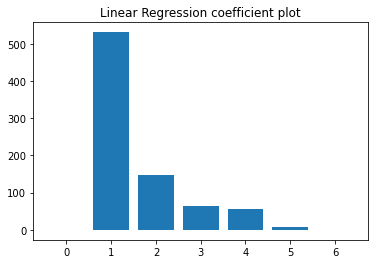

In [8]:
# Running different regression models:

# Linear Regression Model:

reg = LinearRegression().fit(X_train_scaled, y_train)
print('Model: Linear Regression')
print(f'Training Score: {reg.score(X_train_scaled, y_train)}\n')
print(f'Testing Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Linear Regression coefficient plot')
plt.savefig("./Graphs/Linear Regression coefficient plot (Manual Split).png")
plt.show()    

Model: LASSO
Training Score: 0.999977795382918

Testing Score: 0.9999895781109005



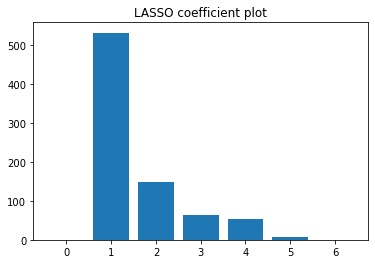

In [9]:
# Lasso Regression:

reg = Lasso(max_iter=2000).fit(X_train_scaled, y_train)
print('Model: LASSO')
print(f'Training Score: {reg.score(X_train_scaled, y_train)}\n')
print(f'Testing Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'LASSO coefficient plot')
plt.savefig("./Graphs/LASSO coefficient plot (Manual Split).png")
plt.show()    

Model: Ridge
Training Score: 0.9999790708056348

Testing Score: 0.999995234053777



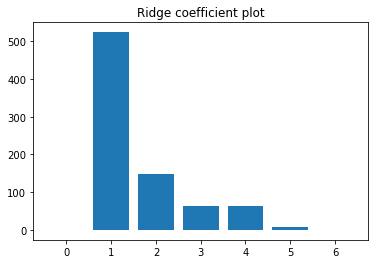

In [10]:
# Ridge Model

reg = Ridge().fit(X_train_scaled, y_train)
print('Model: Ridge')
print(f'Training Score: {reg.score(X_train_scaled, y_train)}\n')
print(f'Testing Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Ridge coefficient plot')
plt.savefig("./Graphs/Ridge coefficient plot (Manual Split).png")
plt.show()    

Model: ElasticNet
Training Score: 0.9717859703716005

Testing Score: 0.9937084660300842



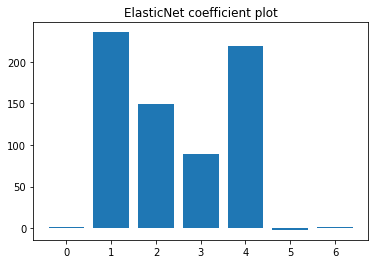

In [11]:
# Elastic Net Model:

reg = ElasticNet(max_iter=2000).fit(X_train_scaled, y_train)
print('Model: ElasticNet')
print(f'Training Score: {reg.score(X_train_scaled, y_train)}\n')
print(f'Testing Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'ElasticNet coefficient plot')
plt.savefig("./Graphs/ElasticNet coefficient plot (Manual Split).png")
plt.show()    